In [1]:
import pandas as pd
import pyodbc 
import numpy as np


In [20]:
import matplotlib.pyplot as plt

In [15]:
iteration=100000
sample_size=100

random_dict={}
for i in range(iteration):
    random_dict[i]=np.random.uniform(0,5,sample_size)



In [17]:
ab=pd.DataFrame(random_dict)

[]

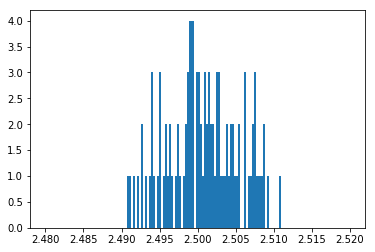

In [40]:
plt.hist(ab.mean(axis=1),bins=150,range=(2.48,2.52))
plt.plot()

[]

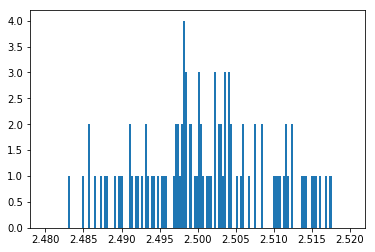

In [41]:
plt.hist(ab.median(axis=1),bins=150,range=(2.48,2.52))
plt.plot()

In [34]:
ab.mean(axis=1)

0     2.500542
1     2.507383
2     2.504811
3     2.500145
4     2.494981
5     2.493828
6     2.505149
7     2.490802
8     2.506305
9     2.499745
10    2.491569
11    2.507529
12    2.501699
13    2.498577
14    2.499174
15    2.492244
16    2.499863
17    2.502461
18    2.504576
19    2.501416
20    2.500879
21    2.497474
22    2.507512
23    2.500053
24    2.505563
25    2.499363
26    2.498705
27    2.508769
28    2.499044
29    2.508210
        ...   
70    2.496039
71    2.492747
72    2.499056
73    2.498594
74    2.507100
75    2.496305
76    2.502384
77    2.502082
78    2.499185
79    2.494139
80    2.497577
81    2.495966
82    2.501760
83    2.508700
84    2.495128
85    2.503693
86    2.493933
87    2.493923
88    2.499442
89    2.507965
90    2.503032
91    2.503779
92    2.510761
93    2.499429
94    2.502583
95    2.501068
96    2.499301
97    2.496296
98    2.507290
99    2.500301
Length: 100, dtype: float64

In [2]:
#initial cleaning function
def clean_sheet(dataframe):
    adj=dataframe.dropna(axis=1,how='all')
    adj=dataframe.set_index(adj.columns[0]) #use stock tickers as the index
    return adj

In [3]:
cc=clean_sheet(pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\{0} 2007-2017.xlsx'.format('Asia'),sheet_name='Index'))

In [63]:
def fundamental_df_clean(region,year,tabs,volume_low,size_low):
    data_dict={}

    for s in tabs:
        df=clean_sheet(pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\{0} {1}.xlsx'.\
                                     format(region,year),sheet_name=s,header=1))
        data_dict[s]=df

    # select the right universe
 
    
    
    fundamental_df=data_dict["Date"].unstack(-1).to_frame()
    fundamental_df.index=fundamental_df.apply(lambda x: x.name[1],axis=1)
    fundamental_df.columns=["Date"]
    
    for i in tabs:
        if i=='Quarter' and data_dict["Quarter"].shape[1]!=data_dict["Date"].shape[1]:
            fundamental_df[i]=pd.concat([data_dict["Quarter"],data_dict["Date"].iloc[:,data_dict["Quarter"].shape[1]-\
                                                                   data_dict["Date"].shape[1]:]],axis=1).unstack(-1).values
        else:
            try:
                fundamental_df[i]=data_dict[i].unstack(-1).values
            except ValueError:
                pass
        
    fundamental_df=fundamental_df.dropna(how="all",axis=0)
    fundamental_df=fundamental_df[-np.isnat(fundamental_df.Date)]

    fundamental_df["Supersector"]=fundamental_df.apply(lambda x:data_dict["Property"].loc[x.name,"Supersector"]\
                                           if type(x.name)==str else None,axis=1)

    fundamental_df["Sector"]=fundamental_df.apply(lambda x:data_dict["Property"].loc[x.name,"Sector"]\
                                           if type(x.name)==str else None,axis=1)




    if 'Index' in data_dict.keys():
        fundamental_df["Index"]=fundamental_df.apply(lambda x: data_dict["Index"].loc[x.name].iloc[0] if type(x.name)==str\
                                                     else None,axis=1)

    fundamental_df=fundamental_df[fundamental_df.apply(lambda x: type(x.name)==str,axis=1)]

    fundamental_df=fundamental_df[(fundamental_df["Market cap"]>size_low)&(fundamental_df["Volume"]>volume_low)]
    
    fundamental_df.index.name='Ticker'
        
    return fundamental_df

In [64]:
US_2019=fundamental_df_clean('US','2019',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [65]:
US_2018=fundamental_df_clean('US','2018',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [66]:
US_history=fundamental_df_clean('US','2007-2017',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [67]:
US=US_history.append(US_2018).append(US_2019)

In [70]:
Europe_2018=fundamental_df_clean('Europe','2018',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [71]:
Europe_2019=fundamental_df_clean('Europe','2019',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [72]:
Europe_history=fundamental_df_clean('Europe','2007-2017',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [73]:
Europe=Europe_history.append(Europe_2018).append(Europe_2019)

In [74]:
Asia_2018=fundamental_df_clean('Asia','2018',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [75]:
Asia_2019=fundamental_df_clean('Asia','2019',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [76]:
Asia_history=fundamental_df_clean('Asia','2007-2017',['Date','Market cap','Volume','Property',\
                                                          'Quarter'],3,500)

In [77]:
Asia=Asia_history.append(Asia_2018).append(Asia_2019)

In [69]:
US.to_csv('US.csv')

In [78]:
Europe.to_csv('Europe.csv')

In [79]:
Asia.to_csv('Asia.csv')